<center><h1>第二章 pandas基础</h1></center>

In [1]:
import numpy as np
import pandas as pd

在开始学习前，请保证 pandas 的版本号不低于1.1.4，否则请务必升级！

## 一、文件的读取和写入
### 1. 文件读取

`pandas`可以读取的文件格式有很多，这里主要介绍读取`csv, excel, txt`文件。

In [2]:
df_csv = pd.read_csv('../data/my_csv.csv')
df_csv

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


- my_csv真实面目
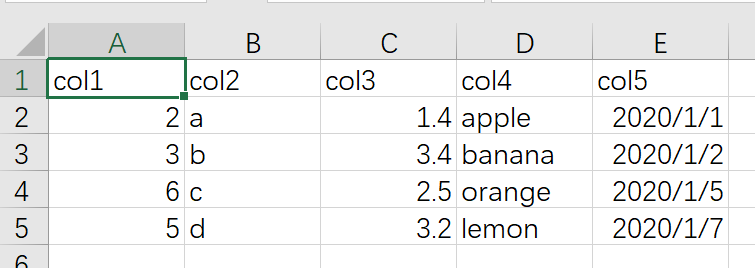

In [3]:
df_txt = pd.read_table('../data/my_table.txt')
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple 2020/1/1
1,3,b,3.4,banana 2020/1/2
2,6,c,2.5,orange 2020/1/5
3,5,d,3.2,lemon 2020/1/7


- myTable.txt真实面目
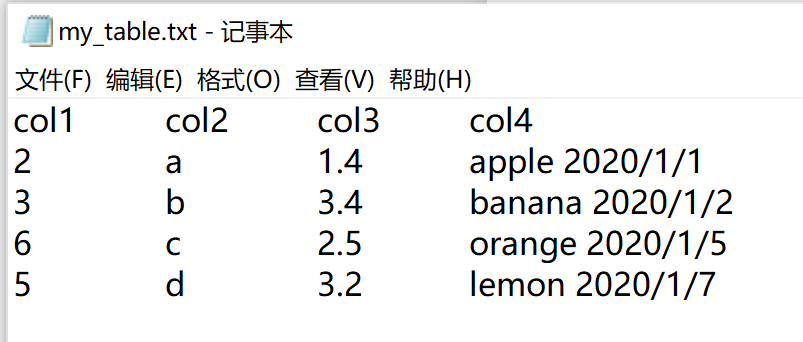

In [4]:
df_excel = pd.read_excel('../data/my_excel.xls')
df_excel

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


- myExcel.xlsx真实面目
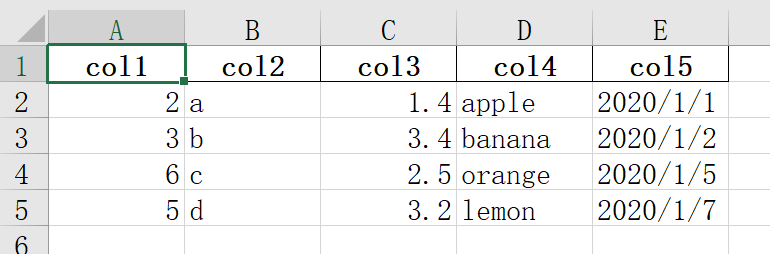

这里有一些常用的公共参数，`header=None`表示第一行不作为列名，`index_col`表示把某一列或几列作为索引，索引的内容将会在第三章进行详述，`usecols`表示读取列的集合，默认读取所有的列，`parse_dates`表示需要转化为时间的列，关于时间序列的有关内容将在第十章讲解，`nrows`表示读取的数据行数。上面这些参数在上述的三个函数里都可以使用。

In [5]:
pd.read_table('../data/my_table.txt', header=None) #把第一行就看作数据

,0,1,2,3
0,col1,col2,col3,col4
1,2,a,1.4,apple 2020/1/1
2,3,b,3.4,banana 2020/1/2
3,6,c,2.5,orange 2020/1/5
4,5,d,3.2,lemon 2020/1/7


In [6]:
pd.read_csv('../data/my_csv.csv', index_col=['col1', 'col2']) #选择一列或多列作为索引，但是作用是什么？

,,col3,col4,col5
col1,col2,,,
2,a,1.4,apple,2020/1/1
3,b,3.4,banana,2020/1/2
6,c,2.5,orange,2020/1/5
5,d,3.2,lemon,2020/1/7


In [7]:
pd.read_table('../data/my_table.txt', usecols=['col1', 'col2']) #只读取括号里指定的列

,col1,col2
0,2,a
1,3,b
2,6,c
3,5,d


In [8]:
pd.read_csv('../data/my_csv.csv', parse_dates=['col5']) #指定需要转为时间的列

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020-01-01
1,3,b,3.4,banana,2020-01-02
2,6,c,2.5,orange,2020-01-05
3,5,d,3.2,lemon,2020-01-07


In [9]:
pd.read_excel('../data/my_excel.xls', nrows=2) # 读取2行数据

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2


在读取`txt`文件时，经常遇到分隔符非空格的情况，`read_table`有一个分割参数`sep`，它使得用户可以自定义分割符号，进行`txt`数据的读取。例如，下面的读取的表以`||||`为分割：

In [10]:
pd.read_table('../data/my_table_special_sep.txt')

,col1 |||| col2
0,TS |||| This is an apple.
1,GQ |||| My name is Bob.
2,WT |||| Well done!
3,PT |||| May I help you?


上面的结果显然不是理想的，这时可以使用`sep`，同时需要指定引擎为`python`：

In [11]:
pd.read_table('../data/my_table_special_sep.txt', sep=' \|\|\|\| ', engine='python')

,col1,col2
0,TS,This is an apple.
1,GQ,My name is Bob.
2,WT,Well done!
3,PT,May I help you?


#### 【WARNING】`sep`是正则参数

在使用`read_table`的时候需要注意，参数`sep`中使用的是正则表达式，因此需要对`|`进行转义变成`\|`，否则无法读取到正确的结果。有关正则表达式的基本内容可以参考第八章或者其他相关资料。

#### 【END】

### 2. 数据写入

一般在数据写入中，最常用的操作是把`index`设置为`False`，特别当索引没有特殊意义的时候，这样的行为能把索引在保存的时候去除。

In [12]:
# 去除无用索引
df_csv.to_csv('../data/my_csv_saved.csv', index=False)
df_excel.to_excel('../data/my_excel_saved.xls', index=False)

`pandas`中没有定义`to_table`函数，但是`to_csv`可以保存为`txt`文件，并且允许自定义分隔符，常用制表符`\t`分割：

In [13]:
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple 2020/1/1
1,3,b,3.4,banana 2020/1/2
2,6,c,2.5,orange 2020/1/5
3,5,d,3.2,lemon 2020/1/7


In [14]:
# 存txt也用to_csv, 可以自定义分隔符，不定义会发生什么？
df_txt.to_csv('../data/my_txt_saved.txt', sep='\t', index=False)
pd.read_table('../data/my_txt_saved.txt')

,col1,col2,col3,col4
0,2,a,1.4,apple 2020/1/1
1,3,b,3.4,banana 2020/1/2
2,6,c,2.5,orange 2020/1/5
3,5,d,3.2,lemon 2020/1/7


In [15]:
# 存txt也用to_csv, 不定义会用【逗号】分隔，但是日期和前面的数据用【空格】分隔，why？
df_txt.to_csv('../data/my_txt_saved.txt', index=False)
pd.read_table('../data/my_txt_saved.txt')

,"col1,col2,col3,col4"
0,"2,a,1.4,apple 2020/1/1"
1,"3,b,3.4,banana 2020/1/2"
2,"6,c,2.5,orange 2020/1/5"
3,"5,d,3.2,lemon 2020/1/7"


如果想要把表格快速转换为`markdown`和`latex`语言，可以使用`to_markdown`和`to_latex`函数，此处需要安装`tabulate`包。

### Csv to Markdown

In [16]:
print(df_csv.to_markdown())

|    |   col1 | col2   |   col3 | col4   | col5     |
|---:|-------:|:-------|-------:|:-------|:---------|
|  0 |      2 | a      |    1.4 | apple  | 2020/1/1 |
|  1 |      3 | b      |    3.4 | banana | 2020/1/2 |
|  2 |      6 | c      |    2.5 | orange | 2020/1/5 |
|  3 |      5 | d      |    3.2 | lemon  | 2020/1/7 |


###  Csv to Latex

In [17]:
print(df_csv.to_latex())

\begin{tabular}{lrlrll}
\toprule
{} &  col1 & col2 &  col3 &    col4 &      col5 \\
\midrule
0 &     2 &    a &   1.4 &   apple &  2020/1/1 \\
1 &     3 &    b &   3.4 &  banana &  2020/1/2 \\
2 &     6 &    c &   2.5 &  orange &  2020/1/5 \\
3 &     5 &    d &   3.2 &   lemon &  2020/1/7 \\
\bottomrule
\end{tabular}



## 二、基本数据结构
`pandas`中具有两种基本的数据存储结构，存储一维`values`的`Series`和存储二维`values`的`DataFrame`，在这两种结构上定义了很多的属性和方法。

### 1. [一维]Series
`Series`一般由四个部分组成，分别是序列的值`data`、索引`index`、存储类型`dtype`、序列的名字`name`。其中，索引也可以指定它的名字，默认为空。

In [18]:
s = pd.Series(data = [100, 'a', {'dic1':5}],
              index = pd.Index(['id1', 20, 'third'], name='my_idx'),
              dtype = 'object',
              name = 'my_name')
s

my_idx
id1              100
20                 a
third    {'dic1': 5}
Name: my_name, dtype: object

 不加索引

In [19]:
s1 = pd.Series(data = [100, 'a', {'dic1':5}],
              dtype = 'object',
              name = 'my_name')
s1

0            100
1              a
2    {'dic1': 5}
Name: my_name, dtype: object

#### 【NOTE】`object`类型

`object`代表了一种混合类型，正如上面的例子中存储了整数、字符串以及`Python`的字典数据结构。此外，目前`pandas`把纯字符串序列也默认认为是一种`object`类型的序列，但它也可以用`string`类型存储，文本序列的内容会在第八章中讨论。

#### 【END】

对于这些属性，可以通过 . 的方式来获取：

In [20]:
s.values

array([100, 'a', {'dic1': 5}], dtype=object)

- 有索引.index的结果

In [21]:
s.index

Index(['id1', 20, 'third'], dtype='object', name='my_idx')

- 无索引.index的结果

In [22]:
s1.index

RangeIndex(start=0, stop=3, step=1)

In [23]:
s.dtype

dtype('O')

In [24]:
s.name

'my_name'

利用`.shape`可以获取序列的长度：

In [25]:
s.shape

(3,)

索引是`pandas`中最重要的概念之一，它将在第三章中被详细地讨论。如果想要取出单个索引对应的值，可以通过`[index_item]`可以取出。

### 2. [二维]DataFrame
`DataFrame`在`Series`的基础上增加了列索引，一个数据框可以由二维的`data`与行列索引来构造：

In [26]:
data = [[1, 'a', 1.2], [2, 'b', 2.2], [3, 'c', 3.2]]
df = pd.DataFrame(data = data,
                  index = ['row_%d'%i for i in range(3)],
                  columns=['col_0', 'col_1', 'col_2'])
df

,col_0,col_1,col_2
row_0,1,a,1.2
row_1,2,b,2.2
row_2,3,c,3.2


但一般而言，更多的时候会采用从列索引名到数据的映射来构造数据框，同时再加上行索引：

In [27]:
df = pd.DataFrame(data = {'col_0': [1,2,3],
                          'col_1':list('abc'),
                          'col_2': [1.2, 2.2, 3.2]},
                  index = ['row_%d'%i for i in range(3)])
df

,col_0,col_1,col_2
row_0,1,a,1.2
row_1,2,b,2.2
row_2,3,c,3.2


由于这种映射关系，在`DataFrame`中可以用`[col_name]`与`[col_list]`来取出相应的列与由多个列组成的表，结果分别为`Series`和`DataFrame`：

- 取数据时，索引会自动显示


In [28]:
df['col_0']

row_0    1
row_1    2
row_2    3
Name: col_0, dtype: int64

In [29]:
df[['col_0', 'col_1']]

,col_0,col_1
row_0,1,a
row_1,2,b
row_2,3,c


与`Series`类似，在数据框中同样可以取出相应的属性：

In [30]:
df.values

array([[1, 'a', 1.2],
       [2, 'b', 2.2],
       [3, 'c', 3.2]], dtype=object)

In [31]:
df.index

Index(['row_0', 'row_1', 'row_2'], dtype='object')

In [32]:
df.columns

Index(['col_0', 'col_1', 'col_2'], dtype='object')

In [33]:
df.dtypes # 返回的是值为相应列数据类型的Series

col_0      int64
col_1     object
col_2    float64
dtype: object

In [34]:
df.shape

(3, 3)

通过`.T`可以把`DataFrame`进行转置：

In [35]:
df.T

,row_0,row_1,row_2
col_0,1,2,3
col_1,a,b,c
col_2,1.2,2.2,3.2


## 三、常用基本函数
为了进行举例说明，在接下来的部分和其余章节都将会使用一份`learn_pandas.csv`的虚拟数据集，它记录了四所学校学生的体测个人信息。

In [36]:
df = pd.read_csv('../data/learn_pandas.csv')
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer',
       'Test_Number', 'Test_Date', 'Time_Record'],
      dtype='object')

In [37]:
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


上述列名依次代表学校、年级、姓名、性别、身高、体重、是否为转系生、体测场次、测试时间、1000米成绩，本章只需使用其中的前七列。

In [38]:
df = df[df.columns[:7]] #取出前7列列名，并用于取新数据，然后存为df
df

,School,Grade,Name,Gender,Height,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N
...,...,...,...,...,...,...,...
195,Fudan University,Junior,Xiaojuan Sun,Female,153.9,46.0,N
196,Tsinghua University,Senior,Li Zhao,Female,160.9,50.0,N
197,Shanghai Jiao Tong University,Senior,Chengqiang Chu,Female,153.9,45.0,N
198,Shanghai Jiao Tong University,Senior,Chengmei Shen,Male,175.3,71.0,N


### 1. 汇总函数
`head, tail`函数分别表示返回表或者序列的前`n`行和后`n`行，其中`n`默认为5：

In [39]:
df.head(2)

,School,Grade,Name,Gender,Height,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N


In [40]:
df.tail(3)

,School,Grade,Name,Gender,Height,Weight,Transfer
197,Shanghai Jiao Tong University,Senior,Chengqiang Chu,Female,153.9,45.0,N
198,Shanghai Jiao Tong University,Senior,Chengmei Shen,Male,175.3,71.0,N
199,Tsinghua University,Sophomore,Chunpeng Lv,Male,155.7,51.0,N


`info, describe`分别返回表的信息概况和表中数值列对应的主要统计量 ：

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   School    200 non-null    object 
 1   Grade     200 non-null    object 
 2   Name      200 non-null    object 
 3   Gender    200 non-null    object 
 4   Height    183 non-null    float64
 5   Weight    189 non-null    float64
 6   Transfer  188 non-null    object 
dtypes: float64(2), object(5)
memory usage: 11.1+ KB


In [42]:
df.describe() #给出统计值

,Height,Weight
count,183.000000,189.000000
mean,163.218033,55.015873
std,8.608879,12.824294
min,145.400000,34.000000
25%,157.150000,46.000000
50%,161.900000,51.000000
75%,167.500000,65.000000
max,193.900000,89.000000


#### 【NOTE】更全面的数据汇总

`info, describe`只能实现较少信息的展示，如果想要对一份数据集进行全面且有效的观察，特别是在列较多的情况下，推荐使用[pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/)包，它将在第十一章被再次提到。

#### 【END】

### 2. 特征统计函数
在`Series`和`DataFrame`上定义了许多统计函数，最常见的是`sum, mean, median, var, std, max, min`。例如，选出身高和体重列进行演示：

In [43]:
df_demo = df[['Height', 'Weight']]
df_demo.mean()

Height    163.218033
Weight     55.015873
dtype: float64

In [44]:
df_demo.max()

Height    193.9
Weight     89.0
dtype: float64

---
### 时间没有安排好，把任务堆在最后了，老师临时布置了一个任务，我没能完成任务。

此外，需要介绍的是`quantile, count, idxmax`这三个函数，它们分别返回的是分位数、非缺失值个数、最大值对应的索引：

In [45]:
df_demo.quantile(0.75)

Height    167.5
Weight     65.0
Name: 0.75, dtype: float64

In [46]:
df_demo.count()

Height    183
Weight    189
dtype: int64

In [47]:
df_demo.idxmax() # idxmin是对应的函数

Height    193
Weight      2
dtype: int64

上面这些所有的函数，由于操作后返回的是标量，所以又称为聚合函数，它们有一个公共参数`axis`，默认为0代表逐列聚合，如果设置为1则表示逐行聚合：

In [48]:
df_demo.mean(axis=1).head() # 在这个数据集上体重和身高的均值并没有意义

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

### 3. 唯一值函数
对序列使用`unique`和`nunique`可以分别得到其唯一值组成的列表和唯一值的个数：

In [49]:
df['School'].unique()

array(['Shanghai Jiao Tong University', 'Peking University',
       'Fudan University', 'Tsinghua University'], dtype=object)

In [50]:
df['School'].nunique()

4

`value_counts`可以得到唯一值和其对应出现的频数：

In [51]:
df['School'].value_counts()

Tsinghua University              69
Shanghai Jiao Tong University    57
Fudan University                 40
Peking University                34
Name: School, dtype: int64

如果想要观察多个列组合的唯一值，可以使用`drop_duplicates`。其中的关键参数是`keep`，默认值`first`表示每个组合保留第一次出现的所在行，`last`表示保留最后一次出现的所在行，`False`表示把所有重复组合所在的行剔除。

In [52]:
df_demo = df[['Gender','Transfer','Name']]
df_demo.drop_duplicates(['Gender', 'Transfer'])

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
12,Female,NaN,Peng You
21,Male,NaN,Xiaopeng Shen
36,Male,Y,Xiaojuan Qin
43,Female,Y,Gaoli Feng


In [53]:
df_demo.drop_duplicates(['Gender', 'Transfer'], keep='last')

,Gender,Transfer,Name
147,Male,NaN,Juan You
150,Male,Y,Chengpeng You
169,Female,Y,Chengquan Qin
194,Female,NaN,Yanmei Qian
197,Female,N,Chengqiang Chu
199,Male,N,Chunpeng Lv


In [54]:
df_demo.drop_duplicates(['Name', 'Gender'], keep=False).head() # 保留只出现过一次的性别和姓名组合

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
4,Male,N,Gaojuan You
5,Female,N,Xiaoli Qian


In [55]:
df['School'].drop_duplicates() # 在Series上也可以使用

0    Shanghai Jiao Tong University
1                Peking University
3                 Fudan University
5              Tsinghua University
Name: School, dtype: object

此外，`duplicated`和`drop_duplicates`的功能类似，但前者返回了是否为唯一值的布尔列表，其`keep`参数与后者一致。其返回的序列，把重复元素设为`True`，否则为`False`。 `drop_duplicates`等价于把`duplicated`为`True`的对应行剔除。

In [56]:
df_demo.duplicated(['Gender', 'Transfer']).head()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [57]:
df['School'].duplicated().head() # 在Series上也可以使用

0    False
1    False
2     True
3    False
4     True
Name: School, dtype: bool

### 4. 替换函数
一般而言，替换操作是针对某一个列进行的，因此下面的例子都以`Series`举例。`pandas`中的替换函数可以归纳为三类：映射替换、逻辑替换、数值替换。其中映射替换包含`replace`方法、第八章中的`str.replace`方法以及第九章中的`cat.codes`方法，此处介绍`replace`的用法。

在`replace`中，可以通过字典构造，或者传入两个列表来进行替换：

In [58]:
df['Gender'].replace({'Female':0, 'Male':1}).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [59]:
df['Gender'].replace(['Female', 'Male'], [0, 1]).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

另外，`replace`还有一种特殊的方向替换，指定`method`参数为`ffill`则为用前面一个最近的未被替换的值进行替换，`bfill`则使用后面最近的未被替换的值进行替换。从下面的例子可以看到，它们的结果是不同的：

In [60]:
s = pd.Series(['a', 1, 'b', 2, 1, 1, 'a'])
s.replace([1, 2], method='ffill')

0    a
1    a
2    b
3    b
4    b
5    b
6    a
dtype: object

In [61]:
s.replace([1, 2], method='bfill')

0    a
1    b
2    b
3    a
4    a
5    a
6    a
dtype: object

#### 【WARNING】正则替换请使用`str.replace`

虽然对于`replace`而言可以使用正则替换，但是当前版本下对于`string`类型的正则替换还存在`bug`，因此如有此需求，请选择`str.replace`进行替换操作，具体的方式将在第八章中讲解。

#### 【END】

逻辑替换包括了`where`和`mask`，这两个函数是完全对称的：`where`函数在传入条件为`False`的对应行进行替换，而`mask`在传入条件为`True`的对应行进行替换，当不指定替换值时，替换为缺失值。

In [62]:
s = pd.Series([-1, 1.2345, 100, -50])
s.where(s<0)

0    -1.0
1     NaN
2     NaN
3   -50.0
dtype: float64

In [63]:
s.where(s<0, 100)

0     -1.0
1    100.0
2    100.0
3    -50.0
dtype: float64

In [64]:
s.mask(s<0)

0         NaN
1      1.2345
2    100.0000
3         NaN
dtype: float64

In [65]:
s.mask(s<0, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

需要注意的是，传入的条件只需是与被调用的`Series`索引一致的布尔序列即可：

In [66]:
s_condition= pd.Series([True,False,False,True],index=s.index)
s.mask(s_condition, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

数值替换包含了`round, abs, clip`方法，它们分别表示取整、取绝对值和截断：

In [67]:
s = pd.Series([-1, 1.2345, 100, -50])
s.round(2)

0     -1.00
1      1.23
2    100.00
3    -50.00
dtype: float64

In [68]:
s.abs()

0      1.0000
1      1.2345
2    100.0000
3     50.0000
dtype: float64

In [69]:
s.clip(0, 2) # 前两个数分别表示上下截断边界

0    0.0000
1    1.2345
2    2.0000
3    0.0000
dtype: float64

#### 【练一练】

在 clip 中，超过边界的只能截断为边界值，如果要把超出边界的替换为自定义的值，应当如何做？

#### 【END】

### 5. 排序函数
排序共有两种方式，其一为值排序，其二为索引排序，对应的函数是`sort_values`和`sort_index`。

为了演示排序函数，下面先利用`set_index`方法把年级和姓名两列作为索引，多级索引的内容和索引设置的方法将在第三章进行详细讲解。

In [70]:
df_demo = df[['Grade', 'Name', 'Height', 'Weight']].set_index(['Grade','Name'])
df_demo.head(3)

Height  Weight
Grade    Name                          
Freshman Gaopeng Yang     158.9    46.0
         Changqiang You   166.5    70.0
Senior   Mei Sun          188.9    89.0

对身高进行排序，默认参数`ascending=True`为升序：

In [71]:
df_demo.sort_values('Height').head()

,,Height,Weight
Grade,Name,,
Junior,Xiaoli Chu,145.4,34.0
Senior,Gaomei Lv,147.3,34.0
Sophomore,Peng Han,147.8,34.0
Senior,Changli Lv,148.7,41.0
Sophomore,Changjuan You,150.5,40.0


In [72]:
df_demo.sort_values('Height', ascending=False).head()

Height  Weight
Grade    Name                         
Senior   Xiaoqiang Qin   193.9    79.0
         Mei Sun         188.9    89.0
         Gaoli Zhao      186.5    83.0
Freshman Qiang Han       185.3    87.0
Senior   Qiang Zheng     183.9    87.0

在排序中，进场遇到多列排序的问题，比如在体重相同的情况下，对身高进行排序，并且保持身高降序排列，体重升序排列：

In [73]:
df_demo.sort_values(['Weight','Height'],ascending=[True,False]).head()

,,Height,Weight
Grade,Name,,
Sophomore,Peng Han,147.8,34.0
Senior,Gaomei Lv,147.3,34.0
Junior,Xiaoli Chu,145.4,34.0
Sophomore,Qiang Zhou,150.5,36.0
Freshman,Yanqiang Xu,152.4,38.0


索引排序的用法和值排序完全一致，只不过元素的值在索引中，此时需要指定索引层的名字或者层号，用参数`level`表示。另外，需要注意的是字符串的排列顺序由字母顺序决定。

In [74]:
df_demo.sort_index(level=['Grade','Name'],ascending=[True,False]).head()

Height  Weight
Grade    Name                         
Freshman Yanquan Wang    163.5    55.0
         Yanqiang Xu     152.4    38.0
         Yanqiang Feng   162.3    51.0
         Yanpeng Lv        NaN    65.0
         Yanli Zhang     165.1    52.0

### 6. apply方法
`apply`方法常用于`DataFrame`的行迭代或者列迭代，它的`axis`含义与第2小节中的统计聚合函数一致，`apply`的参数往往是一个以序列为输入的函数。例如对于`.mean()`，使用`apply`可以如下地写出：

In [75]:
df_demo = df[['Height', 'Weight']]
def my_mean(x):
     res = x.mean()
     return res
df_demo.apply(my_mean)

Height    163.218033
Weight     55.015873
dtype: float64

同样的，可以利用`lambda`表达式使得书写简洁，这里的`x`就指代被调用的`df_demo`表中逐个输入的序列：

In [76]:
df_demo.apply(lambda x:x.mean())

Height    163.218033
Weight     55.015873
dtype: float64

若指定`axis=1`，那么每次传入函数的就是行元素组成的`Series`，其结果与之前的逐行均值结果一致。

In [77]:
df_demo.apply(lambda x:x.mean(), axis=1).head()

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

这里再举一个例子：`mad`函数返回的是一个序列中偏离该序列均值的绝对值大小的均值，例如序列1,3,7,10中，均值为5.25，每一个元素偏离的绝对值为4.25,2.25,1.75,4.75，这个偏离序列的均值为3.25。现在利用`apply`计算升高和体重的`mad`指标：

In [78]:
df_demo.apply(lambda x:(x-x.mean()).abs().mean())

Height     6.707229
Weight    10.391870
dtype: float64

这与使用内置的`mad`函数计算结果一致：

In [79]:
df_demo.mad()

Height     6.707229
Weight    10.391870
dtype: float64

#### 【WARNING】谨慎使用`apply`

得益于传入自定义函数的处理，`apply`的自由度很高，但这是以性能为代价的。一般而言，使用`pandas`的内置函数处理和`apply`来处理同一个任务，其速度会相差较多，因此只有在确实存在自定义需求的情境下才考虑使用`apply`。

#### 【END】

## 四、窗口对象
`pandas`中有3类窗口，分别是滑动窗口`rolling`、扩张窗口`expanding`以及指数加权窗口`ewm`。需要说明的是，以日期偏置为窗口大小的滑动窗口将在第十章讨论，指数加权窗口见本章练习。

### 1. 滑窗对象
要使用滑窗函数，就必须先要对一个序列使用`.rolling`得到滑窗对象，其最重要的参数为窗口大小`window`。

In [80]:
s = pd.Series([1,2,3,4,5])
roller = s.rolling(window = 3)
roller

Rolling [window=3,center=False,axis=0]

在得到了滑窗对象后，能够使用相应的聚合函数进行计算，需要注意的是窗口包含当前行所在的元素，例如在第四个位置进行均值运算时，应当计算(2+3+4)/3，而不是(1+2+3)/3：

In [81]:
roller.mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [82]:
roller.sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

对于滑动相关系数或滑动协方差的计算，可以如下写出：

In [83]:
s2 = pd.Series([1,2,6,16,30])
roller.cov(s2)

0     NaN
1     NaN
2     2.5
3     7.0
4    12.0
dtype: float64

In [84]:
roller.corr(s2)

0         NaN
1         NaN
2    0.944911
3    0.970725
4    0.995402
dtype: float64

此外，还支持使用`apply`传入自定义函数，其传入值是对应窗口的`Series`，例如上述的均值函数可以等效表示：

In [85]:
roller.apply(lambda x:x.mean())

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

`shift, diff, pct_change`是一组类滑窗函数，它们的公共参数为`periods=n`，默认为1，分别表示取向前第`n`个元素的值、与向前第`n`个元素做差（与`Numpy`中不同，后者表示`n`阶差分）、与向前第`n`个元素相比计算增长率。这里的`n`可以为负，表示反方向的类似操作。

In [86]:
s = pd.Series([1,3,6,10,15])
s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [87]:
s.diff(3)

0     NaN
1     NaN
2     NaN
3     9.0
4    12.0
dtype: float64

In [88]:
s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

In [89]:
s.shift(-1)

0     3.0
1     6.0
2    10.0
3    15.0
4     NaN
dtype: float64

In [90]:
s.diff(-2)

0   -5.0
1   -7.0
2   -9.0
3    NaN
4    NaN
dtype: float64

将其视作类滑窗函数的原因是，它们的功能可以用窗口大小为`n+1`的`rolling`方法等价代替：

In [91]:
s.rolling(3).apply(lambda x:list(x)[0]) # s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [92]:
 s.rolling(4).apply(lambda x:list(x)[-1]-list(x)[0]) # s.diff(3)

0     NaN
1     NaN
2     NaN
3     9.0
4    12.0
dtype: float64

In [93]:
def my_pct(x):
     L = list(x)
     return L[-1]/L[0]-1
s.rolling(2).apply(my_pct) # s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

#### 【练一练】

`rolling`对象的默认窗口方向都是向前的，某些情况下用户需要向后的窗口，例如对1,2,3设定向后窗口为2的`sum`操作，结果为3,5,NaN，此时应该如何实现向后的滑窗操作？（提示：使用`shift`）

#### 【END】

### 2. 扩张窗口
扩张窗口又称累计窗口，可以理解为一个动态长度的窗口，其窗口的大小就是从序列开始处到具体操作的对应位置，其使用的聚合函数会作用于这些逐步扩张的窗口上。具体地说，设序列为a1, a2, a3, a4，则其每个位置对应的窗口即\[a1\]、\[a1, a2\]、\[a1, a2, a3\]、\[a1, a2, a3, a4\]。

In [94]:
s = pd.Series([1, 3, 6, 10])
s.expanding().mean()

0    1.000000
1    2.000000
2    3.333333
3    5.000000
dtype: float64

#### 【练一练】

`cummax, cumsum, cumprod`函数是典型的类扩张窗口函数，请使用`expanding`对象依次实现它们。

#### 【END】

## 五、练习
### Ex1：口袋妖怪数据集
现有一份口袋妖怪的数据集，下面进行一些背景说明：

* `#`代表全国图鉴编号，不同行存在相同数字则表示为该妖怪的不同状态

* 妖怪具有单属性和双属性两种，对于单属性的妖怪，`Type 2`为缺失值
* `Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed`分别代表种族值、体力、物攻、防御、特攻、特防、速度，其中种族值为后6项之和

In [95]:
df = pd.read_csv('../data/pokemon.csv')
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80


1. 对`HP, Attack, Defense, Sp. Atk, Sp. Def, Speed`进行加总，验证是否为`Total`值。

2. 对于`#`重复的妖怪只保留第一条记录，解决以下问题：

* 求第一属性的种类数量和前三多数量对应的种类
* 求第一属性和第二属性的组合种类
* 求尚未出现过的属性组合

3. 按照下述要求，构造`Series`：

* 取出物攻，超过120的替换为`high`，不足50的替换为`low`，否则设为`mid`
* 取出第一属性，分别用`replace`和`apply`替换所有字母为大写
* 求每个妖怪六项能力的离差，即所有能力中偏离中位数最大的值，添加到`df`并从大到小排序

### Ex2：指数加权窗口
1. 作为扩张窗口的`ewm`窗口

在扩张窗口中，用户可以使用各类函数进行历史的累计指标统计，但这些内置的统计函数往往把窗口中的所有元素赋予了同样的权重。事实上，可以给出不同的权重来赋给窗口中的元素，指数加权窗口就是这样一种特殊的扩张窗口。

其中，最重要的参数是`alpha`，它决定了默认情况下的窗口权重为$w_i=(1−\alpha)^i,i\in\{0,1,...,t\}$，其中$i=t$表示当前元素，$i=0$表示序列的第一个元素。

从权重公式可以看出，离开当前值越远则权重越小，若记原序列为$x$，更新后的当前元素为$y_t$，此时通过加权公式归一化后可知：

$$
\begin{split}y_t &=\frac{\sum_{i=0}^{t} w_i x_{t-i}}{\sum_{i=0}^{t} w_i} \\
&=\frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^{t} x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^{t-1}}\\\end{split}
$$

对于`Series`而言，可以用`ewm`对象如下计算指数平滑后的序列：

In [96]:
np.random.seed(0)
s = pd.Series(np.random.randint(-1,2,30).cumsum())
s.head()

0   -1
1   -1
2   -2
3   -2
4   -2
dtype: int32

In [97]:
s.ewm(alpha=0.2).mean().head()

0   -1.000000
1   -1.000000
2   -1.409836
3   -1.609756
4   -1.725845
dtype: float64

请用`expanding`窗口实现。

2. 作为滑动窗口的`ewm`窗口

从第1问中可以看到，`ewm`作为一种扩张窗口的特例，只能从序列的第一个元素开始加权。现在希望给定一个限制窗口`n`，只对包含自身最近的`n`个窗口进行滑动加权平滑。请根据滑窗函数，给出新的`wi`与`yt`的更新公式，并通过`rolling`窗口实现这一功能。